<a href="https://colab.research.google.com/github/janburian/BIOM/blob/main/Hodgkin_Huxley_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hodgkin-Huxley model
KKY/BIOM \\
Jan Burian

## Modules import

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

## Model parameters (constants)
Taken from the original article: \\

HODGKIN AL, HUXLEY AF. A quantitative description of membrane current and its application to conduction and excitation in nerve. J Physiol. 1952 Aug;117(4):500-44. doi: 10.1113/jphysiol.1952.sp004764. PMID: 12991237; PMCID: PMC1392413.

In [2]:
# Hodgkin-Huxley model parameters
C_m = 1.0  # membrane capacitance (uF/cm^2)

g_Na = 120  # sodium conductance (mS/cm^2)
g_K = 36  # potassium conductance (mS/cm^2)
g_L = 0.3  # leak conductance (mS/cm^2)

E_Na = -115  # sodium reversal potential (mV)
E_K = 12  # potassium reversal potential (mV)
E_L = -10.613  # leak reversal potential (mV)

## Hodgkin-Huxley model

In [3]:
# Function representing the Hodgkin-Huxley model
def hodgkin_huxley(y, t):
    V_m, n, m, h = y

    # Membrane currents
    I_Na = g_Na * m ** 3 * h * (V_m - E_Na)
    I_K = g_K * n ** 4 * (V_m - E_K)
    I_L = g_L * (V_m - E_L)

    # Total membrane current
    I_ion = I_Na + I_K + I_L

    # Differential equations
    dV_dt = (I_ext_square_wave(t) - I_ion) / C_m

    dn_dt = alpha_n(V_m) * (1 - n) - beta_n(V_m) * n
    dm_dt = alpha_m(V_m) * (1 - m) - beta_m(V_m) * m
    dh_dt = alpha_h(V_m) * (1 - h) - beta_h(V_m) * h

    return [dV_dt, dn_dt, dm_dt, dh_dt]

### Alpha, beta parameters

In [4]:
def alpha_n(V):
    return 0.01 * (V + 10.0) / (-1.0 + (np.exp(V + 10.0) / 10.0))

def beta_n(V):
    return 0.125 * np.exp(V / 80.0)

def alpha_m(V):
    return 0.1 * (V + 25.0) / (-1.0 + (np.exp(V + 25.0) / 10.0))

def beta_m(V):
    return 4.0 * np.exp(V / 18.0)

def alpha_h(V):
    return 0.07 * np.exp(V / 20.0)

def beta_h(V):
    return 1.0 / (1.0 + (np.exp(V + 30.0) / 10.0))

### External current injection

In [8]:
# External current injection functions
# Square wave
def I_ext_square_wave(t):
    if np.logical_and(5 < t, t < 5.9):
        return 100
    if np.logical_and(58 < t, t < 58.9):
        return 100
    if np.logical_and(88 < t, t < 88.9):
        return 100

    else:
        return 0

### Simulation

In [9]:
# Determine the initial conditions
resting_potential = 0  # mV
initial_n = 0.3
initial_m = 0.05
initial_h = 0.6

initial_conditions = [resting_potential, initial_n, initial_m, initial_h]

# Time vector (Time of simulation)
time = np.arange(0, 100, 0.01)

# Solve the differential equations using odeint
solution = odeint(hodgkin_huxley, initial_conditions, time)

### Visualisation
Plotting results

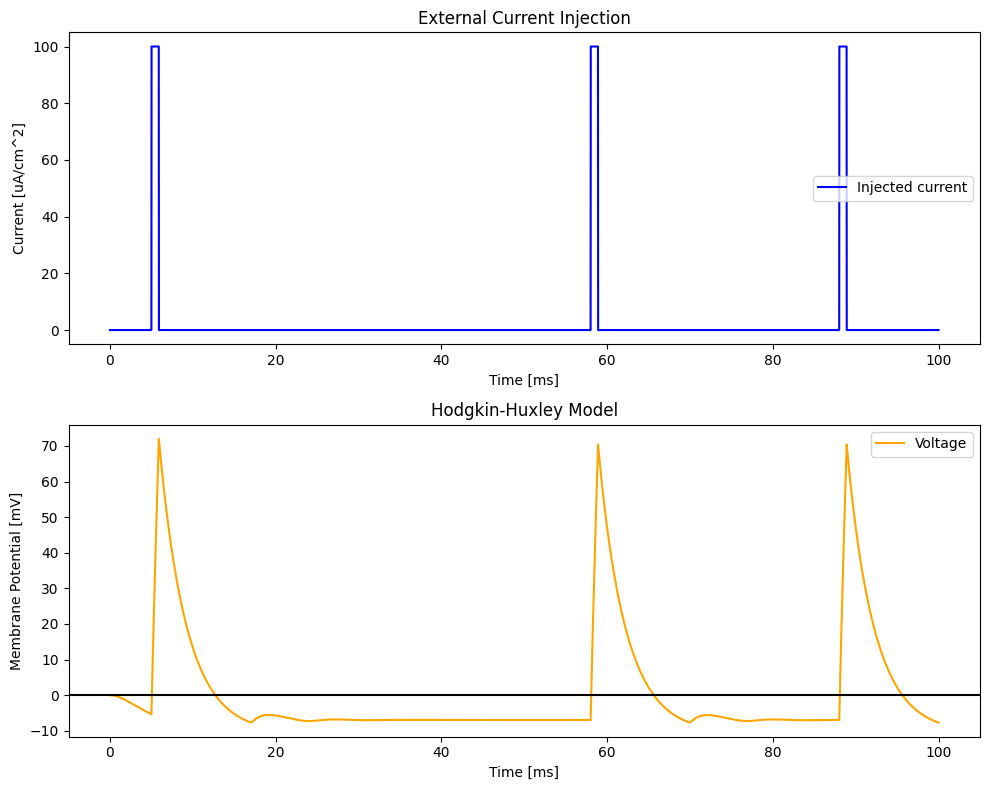

In [13]:
# Plot the results
time_inj = np.arange(0, 100, 0.01)
injection_values = [I_ext_square_wave(t) for t in time_inj]

# Plotting both figures in a single subplot
plt.figure(figsize=(10, 8))

# Subplot 1: Injected current
plt.subplot(2, 1, 1)
plt.plot(time_inj, injection_values, label='Injected current', color='blue')
plt.title('External Current Injection')
plt.xlabel('Time [ms]')
plt.ylabel('Current [uA/cm^2]')
plt.legend()

# Subplot 2: Membrane Potential
plt.subplot(2, 1, 2)
plt.plot(time, solution[:, 0], label='Voltage', color='orange')
plt.axhline(y=0, color='k', linestyle='-')
plt.title('Hodgkin-Huxley Model')
plt.xlabel('Time [ms]')
plt.ylabel('Membrane Potential [mV]')
plt.legend()

# Adjust layout to prevent clipping of titles and labels
plt.tight_layout()

# Show the plot
plt.show()